In [1]:
import patchseq_utils.analysis as utils
from patchseq_utils import plotting as plot
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os.path
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# fix slow autocomplete
%config Completer.use_jedi = False

pd.set_option('use_inf_as_na', True)
pd.options.display.max_columns=300
pd.options.display.max_rows=300
sns.set(style='ticks', context='talk')
from importlib import reload

/local1/storage/envs/ipfx38/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/l1_load.py:131: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  human_df['primary_ephys'] = human_df.eval('collaborator=="AIBS" & failed_fx_long_squares==False')


In [2]:
import patchseq_utils.plot.morphology as pm
import patchseq_utils.plot.sweeps as ps

In [3]:
from patchseq_utils import l1_load
from patchseq_utils import util
from importlib import reload
reload(l1_load)
reload(util)

/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/l1_load.py:131: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  human_df['primary_ephys'] = human_df.eval('collaborator=="AIBS" & failed_fx_long_squares==False')


<module 'patchseq_utils.util' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py'>

In [4]:
from patchseq_utils.l1_load import *
from patchseq_utils.util import *

# Cluster distinctness

In [5]:
mouse_df = mouse_df.loc[lambda df: df.structure.str.contains('VIS')]
group_vals = ['LAMP5', 'MC4R', 'PAX6', 'L1 VIP']
from itertools import combinations
pairs = list(combinations(group_vals, 2))

### Ephys

In [46]:
plot_single = lambda data, f: utils.plot_box_cluster_feature(
    data, f, 'homology_type', x_fine=cluster, palette_fine=palette_human, palette=palette_subclass,
                                   pairs=pairs, test='dunn', drop_box='other')
plot_multiple = lambda data, features, labels=None: utils.plot_boxplot_multiple(
    data, features, labels=labels, x='homology_type', palette_fine=palette_human, palette=palette_subclass,
    plot_function=plot.plot_subclass_focus, subclasses=['other'], label_counts=True,
    pairs=pairs, test='dunn', drop_box='other', figsize=(5,8))

In [47]:
complete_data = subset_data(human_df.query('primary_ephys'), ephys_features, ephys_frac_min=0, cluster_min=0)

# replace with min across groups?
complete_data = complete_data.query('failed_fx_long_squares==False')
data = complete_data.query('l1_type')
complete_features = subset_features(data, ephys_features, complete_frac=0.4)
data['homology_type'].cat.remove_unused_categories(inplace=True)
data['homology_type'].value_counts(sort=False)

LAMP5     96
MC4R      35
PAX6      33
L1 VIP    15
other     15
Name: homology_type, dtype: int64

In [39]:
set(ephys_features).difference(complete_features)

{'adp_v_last_rheo'}

In [40]:
group_col = 'homology_type'
features = complete_features
subset = complete_data.query('core_l1_type').copy()
subset['homology_type'].cat.remove_unused_categories(inplace=True)
human_res_e = utils.run_kw_dunn(subset, features, group_col, posthoc='mw_full')
# res.to_csv(figdir/'supp_tables'/'ephys_kw_posthoc_dunn.csv')
human_res_e.head(20)

,KW_H,pval,epsilon2,pval_fdr,pairs,ipairs,sig_pair_count,p LAMP5 - MC4R,p LAMP5 - PAX6,p LAMP5 - L1 VIP,p MC4R - PAX6,p MC4R - L1 VIP,p PAX6 - L1 VIP,auc LAMP5 - MC4R,auc LAMP5 - PAX6,auc LAMP5 - L1 VIP,auc MC4R - PAX6,auc MC4R - L1 VIP,auc PAX6 - L1 VIP
feature,,,,,,,,,,,,,,,,,,,
sag,102.487897,4.534084e-22,0.575775,4.126016e-20,"[(LAMP5, MC4R), (LAMP5, PAX6), (LAMP5, L1 VIP)...","[01, 02, 03, 12, 23]",5.0,5.519012e-16,5.526008e-06,0.000001,1.602082e-11,0.122243,0.000006,0.975893,0.770518,0.904167,0.987013,0.640000,0.917172
upstroke_adapt_ratio,80.674240,2.199913e-17,0.458376,1.000960e-15,"[(LAMP5, MC4R), (LAMP5, PAX6), (LAMP5, L1 VIP)...","[01, 02, 03, 12, 13, 23]",6.0,3.337611e-14,1.966160e-04,0.000019,5.765827e-07,0.000447,0.047747,0.957071,0.723801,0.856944,0.873278,0.824242,0.680808
sag_area,73.615553,7.174544e-16,0.413571,2.176278e-14,"[(LAMP5, MC4R), (LAMP5, PAX6), (LAMP5, L1 VIP)...","[01, 02, 03, 12, 23]",5.0,2.438095e-13,9.947958e-03,0.000013,7.308885e-08,0.766937,0.000121,0.932440,0.653567,0.862847,0.890909,0.527619,0.849495
sag_peak_t,66.707378,2.163086e-14,0.374761,4.921021e-13,"[(LAMP5, PAX6), (MC4R, PAX6), (PAX6, L1 VIP)]","[02, 12, 23]",3.0,1.645677e-01,1.142231e-13,0.965598,9.504384e-11,0.428506,0.000014,0.591667,0.947917,0.503819,0.968831,0.583810,0.909091
threshold_v_adapt_ratio,62.119294,2.071809e-13,0.352951,3.770693e-12,"[(LAMP5, MC4R), (LAMP5, L1 VIP), (MC4R, PAX6),...","[01, 03, 12, 13, 23]",5.0,5.224011e-12,9.033321e-01,0.000655,4.011690e-08,0.009126,0.002204,0.918245,0.507260,0.789583,0.907254,0.743434,0.789899
fast_trough_deltav_hero,48.122009,2.005901e-10,0.270348,3.042283e-09,"[(LAMP5, MC4R), (LAMP5, PAX6), (LAMP5, L1 VIP)]","[01, 02, 03]",3.0,4.797100e-06,2.254305e-08,0.020822,2.062620e-01,0.206262,0.083635,0.774702,0.844855,0.706597,0.589610,0.615238,0.674747
tau,46.388167,4.689839e-10,0.260608,6.096791e-09,"[(LAMP5, MC4R), (LAMP5, PAX6), (MC4R, PAX6), (...","[01, 02, 12, 23]",4.0,4.601403e-02,5.903340e-10,0.190134,1.053422e-05,0.932515,0.000745,0.623810,0.878472,0.613889,0.827706,0.508571,0.824242
width_adapt_ratio,45.520611,7.171558e-10,0.258640,7.142646e-09,"[(LAMP5, MC4R), (LAMP5, PAX6), (LAMP5, L1 VIP)...","[01, 02, 03, 12, 13]",5.0,6.266294e-09,5.676525e-03,0.005677,8.311969e-04,0.005677,0.648379,0.857008,0.668876,0.738542,0.760790,0.757576,0.542424
input_resistance,45.400262,7.606692e-10,0.256499,7.142646e-09,"[(LAMP5, MC4R), (LAMP5, PAX6), (LAMP5, L1 VIP)]","[01, 02, 03]",3.0,6.835068e-07,1.500768e-03,0.000005,2.163053e-01,0.210541,0.076539,0.803571,0.699544,0.885417,0.588393,0.622857,0.679167


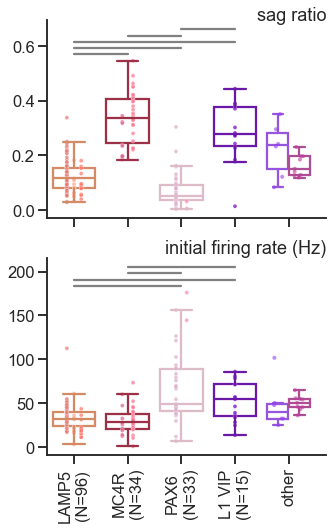

In [15]:
features = ['sag', 'first_isi_inv_hero']
labels = ['sag ratio', 'initial firing rate (Hz)']
plot_multiple(data, features, labels)
save_plot_multiple(figdir/"f2_boxplots_ephys", ['pdf','svg'])

In [102]:
plot_multiple_grouped = lambda data, features, labels=None: utils.plot_boxplot_multiple(
    data, features, labels=labels, x='homology_type', palette_fine=palette_human, palette=palette_subclass,
    plot_function=plot.plot_subclass_focus, 
    subclasses=homology.keys(),  label_counts=False,
    pairs=pairs, test='dunn', drop_box='other', figsize=(5,8))

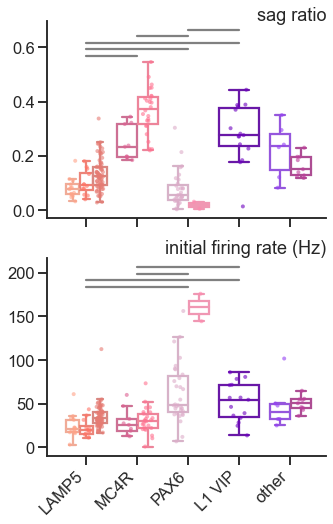

In [103]:
features = ['sag', 'first_isi_inv_hero']
labels = ['sag ratio', 'initial firing rate (Hz)']
plot_multiple_grouped(data, features, labels)

### sag / adapt

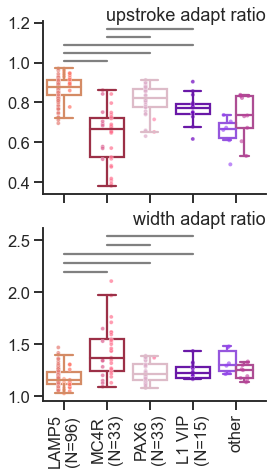

In [53]:
features = ['upstroke_adapt_ratio', 'width_adapt_ratio']
labels = [feature_name(x) for x in features]
utils.plot_boxplot_multiple(
    data, features, labels=labels, x='homology_type', palette_fine=palette_human, palette=palette_subclass,
    plot_function=plot.plot_subclass_focus, subclasses=['other'], label_counts=True,
    pairs=pairs, test='dunn', drop_box='other', figsize=(4,7))
# utils.plot_boxplot_multiple(
#     data, features, labels=labels, x='homology_type', palette_fine=palette_human, palette=palette_subclass,
#     plot_function=plot.plot_subclass_focus, 
#     subclasses=homology.keys(),  label_counts=False,
#     pairs=pairs, test='dunn', drop_box='other', figsize=(5,7))
save_plot_multiple(figdir/"s2_adapt_ratios", ['pdf','svg'])

Text(0, 0.5, 'upstroke adapt ratio')

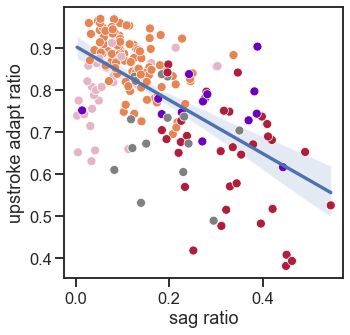

In [60]:
plt.subplots(figsize=(5,5))
sns.regplot(data=data, x='sag', y='upstroke_adapt_ratio', scatter_kws=dict(s=5))
sns.scatterplot(data=data, x='sag', y='upstroke_adapt_ratio', hue='homology_type', 
                palette=palette_subclass, legend=None)
plt.xlabel('sag ratio')
plt.ylabel('upstroke adapt ratio')
save_plot_multiple(figdir/"s2_adapt_vs_sag", ['svg'])

In [61]:
utils.run_regressions(data, ['upstroke_adapt_ratio'], 'sag')

,aic,bic,fvalue,f_pvalue,llf,rsquared,rsquared_adj,nobs,pval_sag,fval_sag,eta_p_sag,model,pval_sag_fdr
feature,,,,,,,,,,,,,
upstroke_adapt_ratio,-340.865957,-334.350966,67.393032,3.324446e-14,172.432979,0.359403,0.356031,192.0,3.324446e-14,67.393032,0.261829,sag,3.324446e-14


### Morpho

In [41]:
complete_data = subset_data(human_df, morph_features, ephys_frac_min=0, cluster_min=0)
data = complete_data.query('l1_type')
data['homology_type'].cat.remove_unused_categories(inplace=True)
data['homology_type'].value_counts(sort=False)

LAMP5     29
MC4R      12
PAX6      19
L1 VIP     4
other      7
Name: homology_type, dtype: int64

In [42]:
group_col = 'homology_type'
features = morph_features
subset = complete_data.query('core_l1_type').copy()
subset['homology_type'].cat.remove_unused_categories(inplace=True)
human_res_m = utils.run_kw_dunn(subset, features, group_col, posthoc='mw_full')
# res.to_csv('data/morph_kw_posthoc_dunn.csv')
human_res_m

,KW_H,pval,epsilon2,pval_fdr,pairs,ipairs,sig_pair_count,p LAMP5 - MC4R,p LAMP5 - PAX6,p LAMP5 - L1 VIP,p MC4R - PAX6,p MC4R - L1 VIP,p PAX6 - L1 VIP,auc LAMP5 - MC4R,auc LAMP5 - PAX6,auc LAMP5 - L1 VIP,auc MC4R - PAX6,auc MC4R - L1 VIP,auc PAX6 - L1 VIP
feature,,,,,,,,,,,,,,,,,,,
basal_dendrite_calculate_number_of_stems,35.052775,1.187371e-07,0.556393,0.000006,"[(LAMP5, MC4R), (LAMP5, PAX6)]","[01, 02]",2.0,0.000108,6.017374e-07,0.231647,0.224418,0.662243,0.370876,0.910920,0.953721,0.724138,0.662281,0.583333,0.657895
basal_dendrite_soma_percentile_y,26.378855,7.944895e-06,0.418712,0.000203,"[(LAMP5, MC4R), (LAMP5, L1 VIP), (MC4R, PAX6),...","[01, 03, 12, 23]",4.0,0.000110,5.270816e-01,0.001760,0.000448,0.454945,0.006098,0.931034,0.555354,0.956897,0.912281,0.666667,0.934211
axon_extent_x,24.101101,2.379486e-05,0.382557,0.000405,"[(LAMP5, MC4R), (MC4R, PAX6), (MC4R, L1 VIP)]","[01, 12, 13]",3.0,0.000170,9.091713e-02,0.565806,0.000135,0.008791,0.906832,0.905172,0.662432,0.620690,0.960526,0.958333,0.526316
axon_frac_above_basal_dendrite,22.972031,4.092875e-05,0.364635,0.000522,"[(LAMP5, MC4R), (MC4R, PAX6), (MC4R, L1 VIP)]","[01, 12, 13]",3.0,0.000074,4.734518e-01,0.094721,0.001150,0.005861,0.328081,0.938218,0.562613,0.793103,0.881579,1.000000,0.684211
axon_frac_below_basal_dendrite,20.595049,1.277596e-04,0.326906,0.001303,"[(LAMP5, MC4R), (MC4R, PAX6)]","[01, 12]",2.0,0.000897,4.670141e-01,0.076367,0.000897,0.194284,0.057076,0.841954,0.549909,0.767241,0.859649,0.750000,0.796053
axon_over_basal_dendrite_ratio_xy,19.280832,2.391724e-04,0.306045,0.002033,"[(LAMP5, MC4R), (LAMP5, L1 VIP), (MC4R, PAX6)]","[01, 03, 12]",3.0,0.000267,7.358788e-01,0.023558,0.009838,0.625055,0.174478,0.910920,0.529946,0.879310,0.820175,0.625000,0.763158
basal_dendrite_bias_y,18.314472,3.788090e-04,0.290706,0.002760,"[(LAMP5, MC4R), (MC4R, PAX6)]","[01, 12]",2.0,0.003105,1.315487e-01,0.320870,0.001240,0.204396,0.131549,0.830460,0.647913,0.663793,0.903509,0.750000,0.802632
axon_max_path_distance,17.723529,5.015367e-04,0.281326,0.003197,"[(LAMP5, MC4R), (LAMP5, PAX6), (LAMP5, L1 VIP)...","[01, 02, 03, 12, 13]",5.0,0.027125,2.712506e-02,0.035718,0.004249,0.023077,0.611180,0.738506,0.705989,0.836207,0.868421,0.937500,0.592105
basal_dendrite_num_branches,17.327101,6.052804e-04,0.275033,0.003430,"[(LAMP5, MC4R), (LAMP5, PAX6), (LAMP5, L1 VIP)]","[01, 02, 03]",3.0,0.012359,1.235933e-02,0.018840,0.935171,0.361464,0.142933,0.788793,0.764973,0.909483,0.510965,0.687500,0.776316


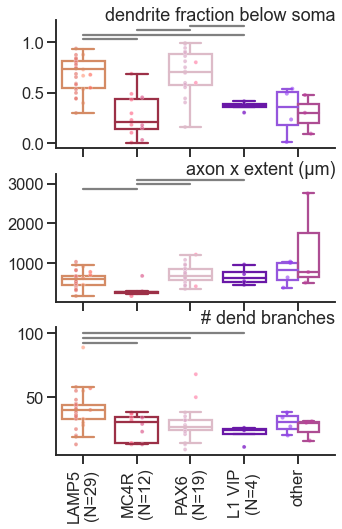

In [19]:
features = [
    'basal_dendrite_soma_percentile_y', 
    'axon_extent_x',
    # 'axon_max_path_distance', 
    'basal_dendrite_num_branches']
labels = [
    'dendrite fraction below soma', 
    'axon x extent (μm)', 
    # 'axon max path dist (μm)', 
    '# dend branches']
plot_multiple(data, features, labels=labels)
save_plot_multiple(figdir/"f2_boxplots_morph", ['pdf','svg'])


In [106]:
plot_multiple_grouped = lambda data, features, labels=None: utils.plot_boxplot_multiple(
    data, features, labels=labels, x='homology_type', palette_fine=palette_human, palette=palette_subclass,
    plot_function=plot.plot_subclass_focus, 
    subclasses=homology.keys(),  label_counts=False,
    pairs=pairs, test='dunn', drop_box='other', figsize=(5,8))

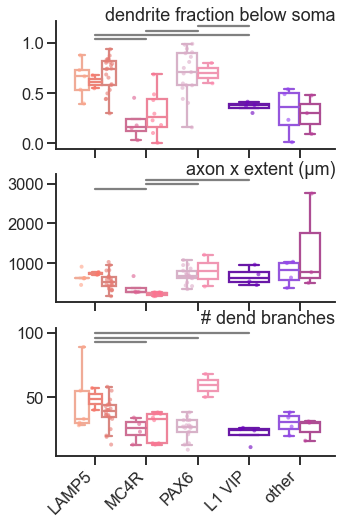

In [107]:
plot_multiple_grouped(data, features, labels)

### T-type

In [79]:
# TODO: include this??
group_col = cluster
features = complete_features
subset = complete_data.query('core_l1_type').copy()
subset[group_col].cat.remove_unused_categories(inplace=True)
res = utils.run_kw_dunn(subset, features, group_col)
res.head(20)

,KW_H,pval_cluster,rsquared,epsilon2,pairs,ipairs,pair_count
feature,,,,,,,
upstroke_adapt_ratio,131.350665,3.183157e-23,0.600728,0.613788,"[(PAX6 CDH12, LAMP5 LCP2), (PAX6 CDH12, LAMP5 ...","[02, 03, 05, 06, 07, 12, 13, 24, 25, 26, 27, 3...",18
sag,122.144917,1.327986e-21,0.550933,0.565486,"[(PAX6 CDH12, LAMP5 NMBR), (PAX6 CDH12, SST CH...","[04, 05, 06, 07, 15, 16, 17, 24, 25, 26, 27, 3...",17
threshold_v_adapt_ratio,115.523869,2.115253e-20,0.524270,0.539831,"[(PAX6 CDH12, LAMP5 LCP2), (PAX6 CDH12, SST CH...","[02, 05, 06, 07, 12, 24, 25, 26, 27, 34, 35, 3...",15
width_adapt_ratio,97.222652,7.927760e-17,0.435858,0.454311,"[(PAX6 CDH12, LAMP5 LCP2), (PAX6 CDH12, LAMP5 ...","[02, 03, 06, 12, 23, 24, 25, 26, 27, 35, 36, 3...",14
downstroke_adapt_ratio,97.197092,7.927760e-17,0.435735,0.454192,"[(PAX6 CDH12, LAMP5 LCP2), (PAX6 CDH12, LAMP5 ...","[02, 03, 06, 12, 24, 25, 26, 27, 35, 36, 37, 4...",13
sag_peak_t,94.014574,2.989940e-16,0.416338,0.435253,"[(PAX6 CDH12, LAMP5 LCP2), (PAX6 CDH12, LAMP5 ...","[02, 03, 04, 05, 06, 07, 14, 15, 16, 17, 24, 2...",13
sag_area,90.066824,1.661135e-15,0.397449,0.416976,"[(PAX6 CDH12, LAMP5 NMBR), (PAX6 CDH12, SST CH...","[04, 05, 06, 07, 15, 16, 17, 24, 25, 26, 27, 3...",17
trough_slowdeltav_rheo,84.441796,2.067645e-14,0.370535,0.390934,"[(PAX6 CDH12, PAX6 TNFAIP8L3), (PAX6 CDH12, LA...","[01, 02, 03, 04, 07, 12, 13, 14, 16, 24, 25, 2...",19
ir_late_hero,80.054558,1.447091e-13,0.358111,0.379405,"[(PAX6 CDH12, LAMP5 LCP2), (PAX6 CDH12, LAMP5 ...","[02, 03, 04, 14, 26, 27, 36, 37, 45, 46, 47]",11


# Subclass examples

/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


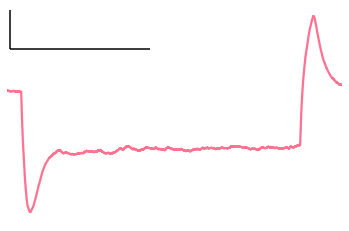

In [25]:
cell = human_df.query("collaborator=='AIBS' & sag>0.5").iloc[0]
dataset, sweeps = ps.get_dataset_sweeps(cell['spec_id.1'], lims_sweep_info=True, qc_sweeps=True)

ps.plot_sag(dataset, sweeps, color=palette_human[cell[cluster]], n_max=1, scalebar=True, dy=55, loc='upper left')

save_plot_multiple(figdir/"f2_sag_1", ['pdf','svg'])

/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


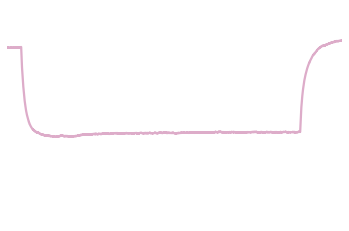

In [26]:
cell = human_df.query('sag<0.1 & collaborator=="AIBS"').iloc[2]

dataset, sweeps = ps.get_dataset_sweeps(cell['spec_id.1'], lims_sweep_info=True, qc_sweeps=True)
ps.plot_sag(dataset, sweeps, color=palette_human[cell[cluster]], n_max=1, dy=55)

save_plot_multiple(figdir/"f2_sag_2", ['pdf','svg'])

/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


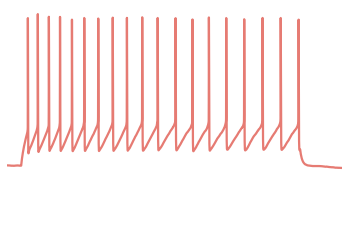

In [27]:
cell = human_df.query('first_isi_inv_hero<30 & collaborator=="AIBS" & homology_type=="LAMP5"').iloc[2]

dataset, sweeps = ps.get_dataset_sweeps(cell['spec_id.1'], lims_sweep_info=True, qc_sweeps=True)
ps.plot_hero(dataset, sweeps, color=palette_human[cell[cluster]], n_max=1, dy=150)

save_plot_multiple(figdir/"f2_ifr_1", ['pdf','svg'])

/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


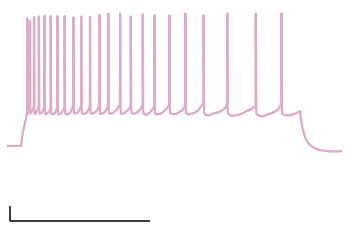

In [28]:
cell = human_df.query('first_isi_inv_hero>100 & collaborator=="AIBS"').iloc[0]

dataset, sweeps = ps.get_dataset_sweeps(cell['spec_id.1'], lims_sweep_info=True, qc_sweeps=True)
ps.plot_hero(dataset, sweeps, color=palette_human[cell[cluster]], n_max=1,dy=150, scalebar=True, loc='lower left')

save_plot_multiple(figdir/"f2_ifr_2", ['pdf','svg'])

# Mouse

In [78]:
plot_single = lambda data, f: utils.plot_box_cluster_feature(
    data, f, 'homology_type', x_fine=cluster, palette_fine=palette_mouse, palette=palette_subclass,
                                   pairs_sets=[pairs], test='dunn', drop_box='other')
plot_multiple = lambda data, features, labels=None: utils.plot_boxplot_multiple(
    data, features, labels=labels, x='homology_type', x_fine=cluster, palette_fine=palette_mouse, palette=palette_subclass,
                                   pairs_sets=[pairs], test='dunn', drop_box='other', figsize=(5,8))

### Ephys

In [15]:
features = ephys_features
group_col = 'homology_type'
complete_data = subset_data(mouse_df, features, ephys_frac_min=0, cluster_min=0)
# replace with min across groups?
# complete_features = (complete_data.groupby(group_col, observed=True)[features].apply(lambda df:
#                      df.notna().mean(axis=0)).min(axis=0).loc[lambda x: x>0.4].index)
complete_features = subset_features(complete_data, ephys_features, complete_frac=0.4)
data = complete_data.query('l1_type')
data['homology_type'].cat.remove_unused_categories(inplace=True)
data['homology_type'].value_counts(sort=False)

LAMP5     202
MC4R       23
PAX6        4
L1 VIP     43
Name: homology_type, dtype: int64

In [86]:
set(ephys_features).difference(complete_features)

{'3db_freq_chirp',
 'adp_v_last_rheo',
 'low_freq_impedance_chirp',
 'peak_freq_chirp',
 'peak_impedance_chirp',
 'peak_ratio_chirp',
 'phase_low_chirp',
 'phase_peak_chirp',
 'sync_freq_chirp',
 'total_inductive_phase_chirp'}

In [87]:
features = complete_features
mouse_res_e = utils.run_kw_dunn(data, features, group_col, posthoc='mw_full')
mouse_res_e.head(30)

,KW_H,pval,epsilon2,pval_fdr,pairs,ipairs,sig_pair_count,p LAMP5 - MC4R,p LAMP5 - PAX6,p LAMP5 - L1 VIP,p MC4R - PAX6,p MC4R - L1 VIP,p PAX6 - L1 VIP,auc LAMP5 - MC4R,auc LAMP5 - PAX6,auc LAMP5 - L1 VIP,auc MC4R - PAX6,auc MC4R - L1 VIP,auc PAX6 - L1 VIP
feature,,,,,,,,,,,,,,,,,,,
tau,117.713737,2.397640e-25,0.440875,1.966065e-23,"[(LAMP5, MC4R), (LAMP5, PAX6), (LAMP5, L1 VIP)...","[01, 02, 03, 12, 13]",5.0,6.939824e-04,0.000017,6.301734e-23,0.008508,5.571538e-09,0.136069,0.727730,0.981156,0.988314,0.909091,0.958774,0.732558
input_resistance,112.304000,3.503085e-24,0.419045,1.436265e-22,"[(LAMP5, MC4R), (LAMP5, L1 VIP), (MC4R, L1 VIP...","[01, 03, 13, 23]",4.0,4.989656e-03,0.081370,2.355884e-23,0.559866,1.804290e-09,0.000852,0.690909,0.767500,0.992791,0.602273,0.972516,0.959302
postap_slope_hero,110.761325,7.524667e-24,0.413289,2.056742e-22,"[(LAMP5, MC4R), (LAMP5, L1 VIP), (MC4R, L1 VIP...","[01, 03, 13, 23]",4.0,4.848341e-06,0.128218,1.151034e-21,0.559866,8.365946e-04,0.004053,0.811818,0.737500,0.973953,0.602273,0.769556,0.918605
first_isi_inv_hero,107.322196,4.135782e-23,0.417596,8.478352e-22,"[(LAMP5, PAX6), (LAMP5, L1 VIP), (MC4R, L1 VIP)]","[02, 03, 13]",3.0,6.506423e-02,0.049145,4.105229e-23,0.124675,4.228557e-07,0.195552,0.637435,0.963731,0.991746,0.875000,0.915116,0.779070
adapt_mean,105.240546,1.159863e-22,0.397134,1.902176e-21,"[(LAMP5, MC4R), (LAMP5, PAX6), (LAMP5, L1 VIP)...","[01, 02, 03, 13]",4.0,6.358981e-03,0.040597,1.437213e-22,0.313043,6.437073e-05,0.890909,0.691868,0.922111,0.984340,0.772727,0.824524,0.534884
sag_area,100.223469,1.391378e-21,0.373968,1.901550e-20,"[(LAMP5, MC4R), (LAMP5, PAX6), (LAMP5, L1 VIP)]","[01, 02, 03]",3.0,1.098443e-17,0.000005,4.649480e-15,0.469103,7.221098e-01,0.469103,0.857159,0.855625,0.752965,0.642045,0.526956,0.630814
isi_adapt_ratio,99.089729,2.438998e-21,0.378205,2.744561e-20,"[(LAMP5, PAX6), (LAMP5, L1 VIP), (MC4R, L1 VIP)]","[02, 03, 13]",3.0,5.581333e-02,0.021891,1.437678e-21,0.237154,8.390074e-06,1.000000,0.638430,0.952261,0.982473,0.809524,0.866434,0.500000
adapt_hero,94.738717,2.677620e-21,0.382011,2.744561e-20,"[(LAMP5, MC4R), (LAMP5, L1 VIP), (MC4R, L1 VIP)]","[01, 02, 12]",3.0,2.663675e-03,NaN,7.166638e-21,NaN,6.099331e-05,NaN,0.709406,NaN,0.968465,NaN,0.830827,NaN
rheobase_i,98.149870,3.883922e-21,0.366231,3.430371e-20,"[(LAMP5, L1 VIP), (MC4R, L1 VIP), (PAX6, L1 VIP)]","[03, 13, 23]",3.0,6.361837e-01,0.098884,1.263723e-21,0.253895,8.249325e-09,0.015700,0.530795,0.768750,0.972791,0.704545,0.950846,0.901163


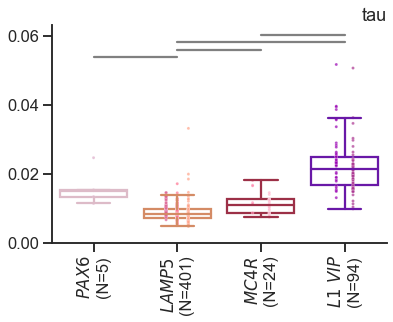

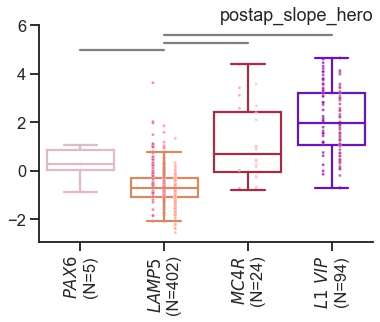

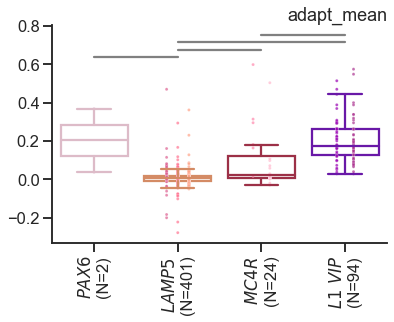

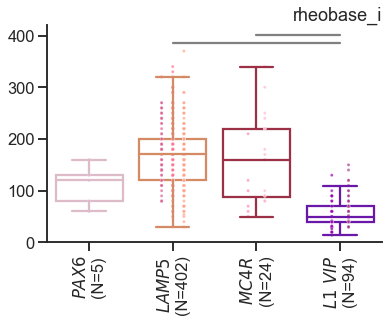

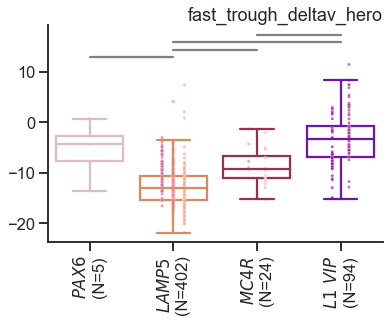

In [167]:
corr = complete_data[complete_features].corr(method='spearman')
features = utils.select_distinct(res.index, corr, nfeat=5, threshold=0.7)
for f in features:
    plot_single(data, f)

In [73]:
reload(plot)
reload(utils)

<module 'patchseq_utils.analysis' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/analysis.py'>

In [16]:
features = [
    'latency_rheo',
    'adapt_mean',
    'sag_depol',
    'sag',
    'input_resistance'
]
labels=[
    'AP latency (s)',
    'adaptation index',
    'depol sag ratio',
    'sag ratio',
    'input resistance (MΩ)'
]

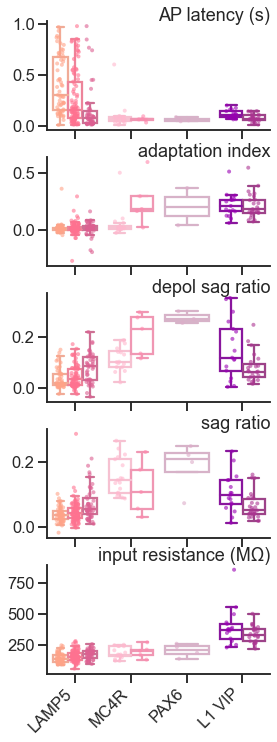

In [17]:
utils.plot_boxplot_multiple(
    data, features, labels=labels, x='homology_type', palette_fine=palette_mouse, palette=palette_subclass,
    plot_function=plot.plot_subclass_focus, 
    subclasses=['LAMP5','MC4R','PAX6','L1 VIP'],  label_counts=False,
    pairs=None, test='dunn', figsize=(4, 12))
save_plot_multiple(figdir/"s7_schuman_ephys", ['svg'])

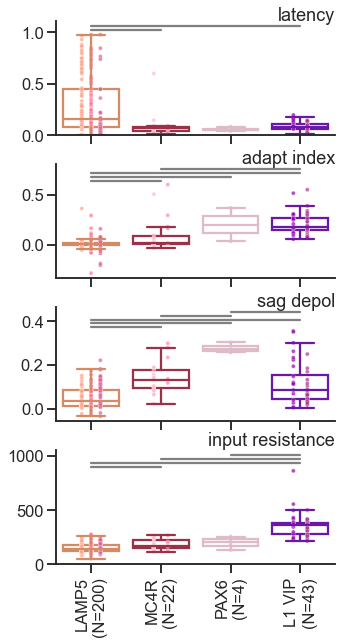

In [75]:
utils.plot_boxplot_multiple(data, features, 'homology_type', labels=labels, 
                            x_fine=cluster, palette_fine=palette_mouse, palette=palette_subclass,
                                   pairs='all', size=4, figsize=(4,10)) 
# save_plot_multiple(figdir/"s7_schuman_ephys", ['svg'])

### Morpho

In [97]:
complete_data = subset_data(mouse_df, morph_features, ephys_frac_min=0, cluster_min=0)
data = complete_data.query('l1_type')
data['homology_type'].cat.remove_unused_categories(inplace=True)
data['homology_type'].value_counts(sort=False)

LAMP5     28
MC4R       6
PAX6       1
L1 VIP     8
Name: homology_type, dtype: int64

In [32]:
group_col = 'homology_type'
features = morph_features

mouse_res_m = utils.run_kw_dunn(data, features, group_col, posthoc='mw_full')
mouse_res_m

,KW_H,pval,epsilon2,pval_fdr,pairs,ipairs,sig_pair_count,p LAMP5 - MC4R,p LAMP5 - PAX6,p LAMP5 - L1 VIP,p LAMP5 - other,p MC4R - PAX6,p MC4R - L1 VIP,p MC4R - other,p PAX6 - L1 VIP,p PAX6 - other,p L1 VIP - other,auc LAMP5 - MC4R,auc LAMP5 - PAX6,auc LAMP5 - L1 VIP,auc LAMP5 - other,auc MC4R - PAX6,auc MC4R - L1 VIP,auc MC4R - other,auc PAX6 - L1 VIP,auc PAX6 - other,auc L1 VIP - other
feature,,,,,,,,,,,,,,,,,,,,,,,,,,,
basal_dendrite_calculate_number_of_stems,38.903408,7.293932e-08,0.555763,0.000004,"[(LAMP5, MC4R), (LAMP5, PAX6), (LAMP5, other)]","[01, 02, 04]",3.0,0.000179,0.000001,0.308862,0.001173,0.280522,0.662243,0.386330,0.386330,0.662243,0.386330,0.910920,0.953721,0.724138,0.938424,0.662281,0.583333,0.666667,0.657895,0.560150,0.714286
basal_dendrite_soma_percentile_y,33.718444,8.511291e-07,0.481692,0.000022,"[(LAMP5, MC4R), (LAMP5, L1 VIP), (LAMP5, other...","[01, 03, 04, 12, 23, 24]",6.0,0.000184,0.595380,0.001760,0.000581,0.000581,0.541601,0.595380,0.006776,0.001376,0.787879,0.931034,0.555354,0.956897,0.921182,0.912281,0.666667,0.595238,0.934211,0.917293,0.571429
axon_frac_above_basal_dendrite,30.712495,3.503887e-06,0.438750,0.000060,"[(LAMP5, MC4R), (LAMP5, other), (MC4R, PAX6), ...","[01, 04, 12, 13, 24, 34]",6.0,0.000123,0.526058,0.090211,0.003649,0.001917,0.007036,0.625383,0.341751,0.007036,0.012426,0.938218,0.562613,0.793103,0.903941,0.881579,1.000000,0.565476,0.684211,0.879699,1.000000
axon_frac_below_basal_dendrite,27.499734,1.575059e-05,0.392853,0.000169,"[(LAMP5, MC4R), (LAMP5, other), (MC4R, PAX6), ...","[01, 04, 12, 24]",4.0,0.001496,0.518905,0.084852,0.002154,0.001496,0.231094,0.641464,0.057076,0.002154,0.231094,0.841954,0.549909,0.767241,0.871921,0.859649,0.750000,0.571429,0.796053,0.883459,0.767857
basal_dendrite_frac_above_axon,27.396910,1.652373e-05,0.391384,0.000169,"[(LAMP5, MC4R), (LAMP5, other), (PAX6, other)]","[01, 04, 24]",3.0,0.004588,0.156351,1.000000,0.000017,0.156351,0.290182,0.156798,0.623948,0.004343,0.125631,0.666667,0.552632,0.500000,0.857143,0.627193,0.666667,0.714286,0.552632,0.842105,0.857143
axon_bias_x,26.558379,2.441320e-05,0.379405,0.000196,"[(LAMP5, MC4R), (LAMP5, other), (MC4R, PAX6), ...","[01, 04, 12, 14, 34]",5.0,0.004695,0.116131,0.090237,0.002728,0.002735,0.683516,0.000397,0.077761,0.050000,0.012121,0.813218,0.640653,0.784483,0.896552,0.864035,0.583333,1.000000,0.815789,0.781955,1.000000
axon_extent_x,26.350714,2.688743e-05,0.376439,0.000196,"[(LAMP5, MC4R), (MC4R, PAX6), (MC4R, L1 VIP), ...","[01, 12, 13, 14]",4.0,0.000284,0.121223,0.592845,0.156176,0.000225,0.010989,0.000926,0.906832,0.592845,0.592845,0.905172,0.662432,0.620690,0.709360,0.960526,0.958333,0.964286,0.526316,0.586466,0.642857
axon_soma_percentile_y,24.862602,5.361331e-05,0.355180,0.000342,"[(LAMP5, MC4R), (LAMP5, other), (MC4R, PAX6), ...","[01, 04, 12, 13, 24, 34]",6.0,0.001157,0.784031,0.784031,0.000786,0.011664,0.003663,0.143231,0.631846,0.004287,0.011664,0.870690,0.524501,0.551724,0.935961,0.793860,1.000000,0.738095,0.618421,0.887218,1.000000
axon_over_basal_dendrite_ratio_xy,22.159426,1.862938e-04,0.316563,0.001056,"[(LAMP5, MC4R), (LAMP5, L1 VIP), (LAMP5, other...","[01, 03, 04, 12]",4.0,0.000444,0.919849,0.029448,0.023791,0.016397,0.744113,1.000000,0.193864,0.126695,1.000000,0.910920,0.529946,0.879310,0.822660,0.820175,0.625000,0.500000,0.763158,0.744361,0.535714


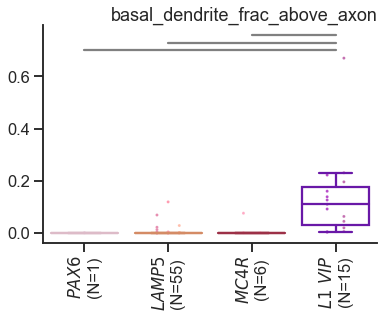

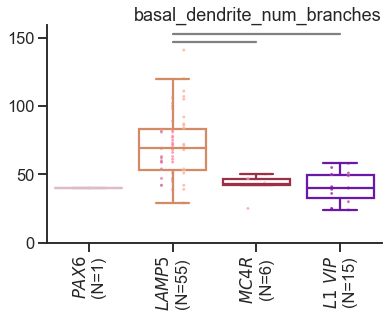

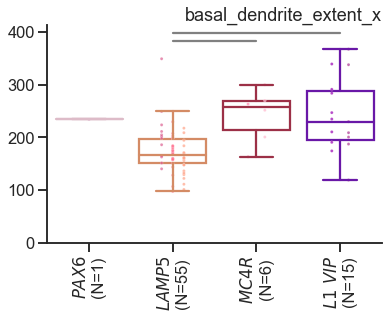

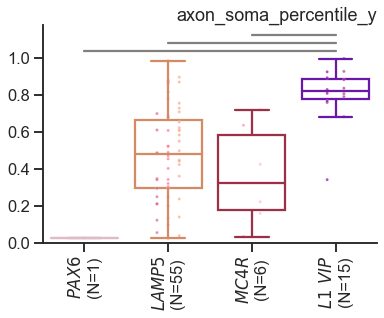

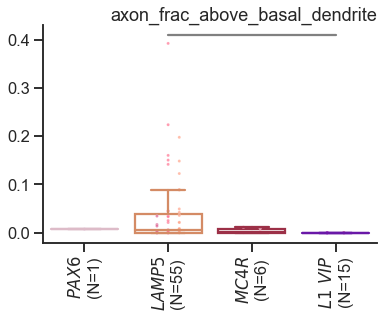

In [29]:
corr = complete_data[features].corr(method='spearman')
features = utils.select_distinct(res.index, corr, nfeat=5, threshold=0.7)
for f in features:
    plot_single(data, f)

In [18]:
features = [
    'basal_dendrite_num_branches',
    'basal_dendrite_extent_x',
    'axon_tortuosity',
    'axon_extent_x',
    'axon_extent_y',
]
data['axon_tortuosity'] = 1/data['axon_mean_contraction']
labels=[feature_name(x) for x in features]
labels[1] += ' (μm)'
labels[3] += ' (μm)'
labels[4] += ' (μm)'

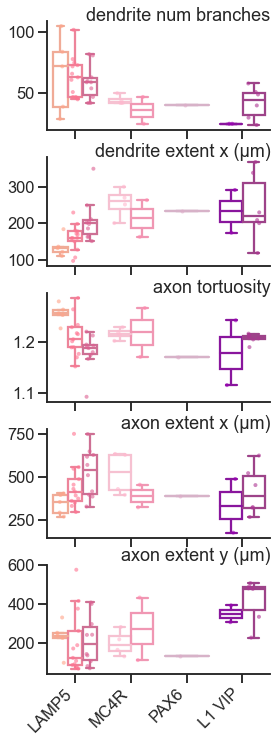

In [19]:
utils.plot_boxplot_multiple(
    data, features, labels=labels, x='homology_type', palette_fine=palette_mouse, palette=palette_subclass,
    plot_function=plot.plot_subclass_focus, 
    subclasses=['LAMP5','MC4R','PAX6','L1 VIP'],  label_counts=False,
    pairs=None, test='dunn', figsize=(4, 12))
save_plot_multiple(figdir/"s7_schuman_morph", ['svg'])

/tmp/ipykernel_26999/782543218.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['axon_tortuosity'] = 1/data['axon_mean_contraction']


(1.0, 1.4163383192315806)

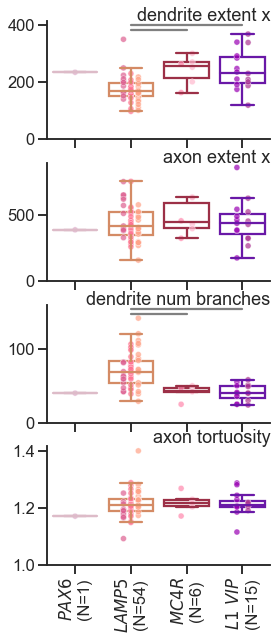

In [151]:
utils.plot_boxplot_multiple(data, features, 'homology_type', labels=feature_name, 
                            x_fine=cluster, palette_fine=palette_mouse, palette=palette_subclass,
                                   pairs_sets=[pairs], size=6, figsize=(4,10)) 
plt.ylim(1, None)

## Pax6 doublets

In [6]:
cols = [
    'cell_name', 'topLeaf', 'collaborator', 
     'has_morph', 'has_ephys',
        'layer', 'normalized_layer_depth',
        'contam_sum', 'topLeafValue'
       ]

In [7]:
ttype = "Pax6"
cells = mouse_df.loc[lambda df: df['topLeaf'].str.contains(ttype)
                         & df['has_morph']
                     , set(cols+['Tree_call', 'Tree_second_cl']).intersection(mouse_df.columns)]
cells

,Tree_second_cl,normalized_layer_depth,layer,cell_name,has_ephys,topLeafValue,Tree_call,topLeaf,has_morph,contam_sum
spec_id,,,,,,,,,,
993243528,Lamp5 Fam19a1 Tmem182,0.080813,2/3,Sncg-IRES2-FlpO-neo;Ai65F-500414.03.01.01,True,0.95,Core,Lamp5 Fam19a1 Pax6,True,0.405321
764341238,Lamp5 Plch2 Dock5,0.799938,1,Slc32a1-IRES-Cre;Ai14-418814.04.02.01,True,0.93,Core,Lamp5 Fam19a1 Pax6,True,0.233787


709461711 ephys


/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


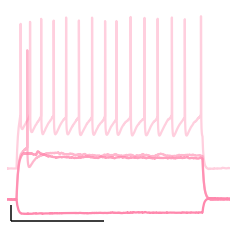

In [10]:
plot.plot_trace_morph(709461711, mouse_df, palette=palette_mouse, morph=False,
                        plot_peri=True, rotate=True, scale_factor=150, save=True)

993243528 morph


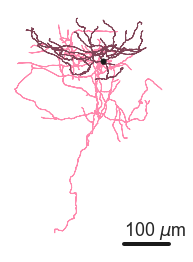

993243528 ephys


/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


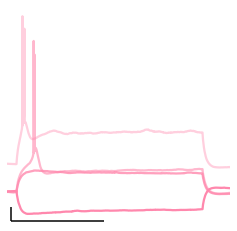

In [12]:
plot.plot_trace_morph(993243528, mouse_df, palette=palette_mouse,
                         plot_peri=True, rotate=True, scale_factor=150, save=True)

# Stats dump

In [45]:
with pd.ExcelWriter(figdir/'supp_tables'/'data_S2_subclass_subtype_statistics.xlsx') as writer: 
                # mode="w", engine="openpyxl", if_sheet_exists="replace",) as writer: 
    human_res_m.to_excel(writer, sheet_name='Human cross-subclass morphology')
    human_res_e.to_excel(writer, sheet_name='Human cross-subclass electrophysiology')
    mouse_res_m.to_excel(writer, sheet_name='Mouse cross-subclass morphology')
    mouse_res_e.to_excel(writer, sheet_name='Mouse cross-subclass electrophysiology')